SISTEM FUZZY SUGENO - DIAGNOSIS TINGKAT RISIKO DBD

Data Pasien:
- Suhu Tubuh: 38.5°C
- Trombosit: 120 x10³/μL
- Leukosit: 3.8 x10³/μL

=== DERAJAT KEANGGOTAAN ===
Suhu Normal: 0.000, Demam: 0.750, Tinggi: 0.167
Trombosit Rendah: 1.000, Normal: 0.000
Leukosit Rendah: 1.000, Normal: 0.000

=== DERAJAT KEANGGOTAAN RULES ===
Rule 1 (α1): 0.167 → z1 = 100
Rule 2 (α2): 0.750 → z2 = 100
Rule 3 (α3): 0.000 → z3 = 50
Rule 4 (α4): 0.000 → z4 = 20
Rule 5 (α5): 0.000 → z5 = 50

=== DEFUZZIFIKASI ===
Numerator: 91.667
Denominator: 0.917
Hasil (Weighted Average): 100.00

HASIL DIAGNOSIS:
Tingkat Risiko DBD: 100.00 (TINGGI)


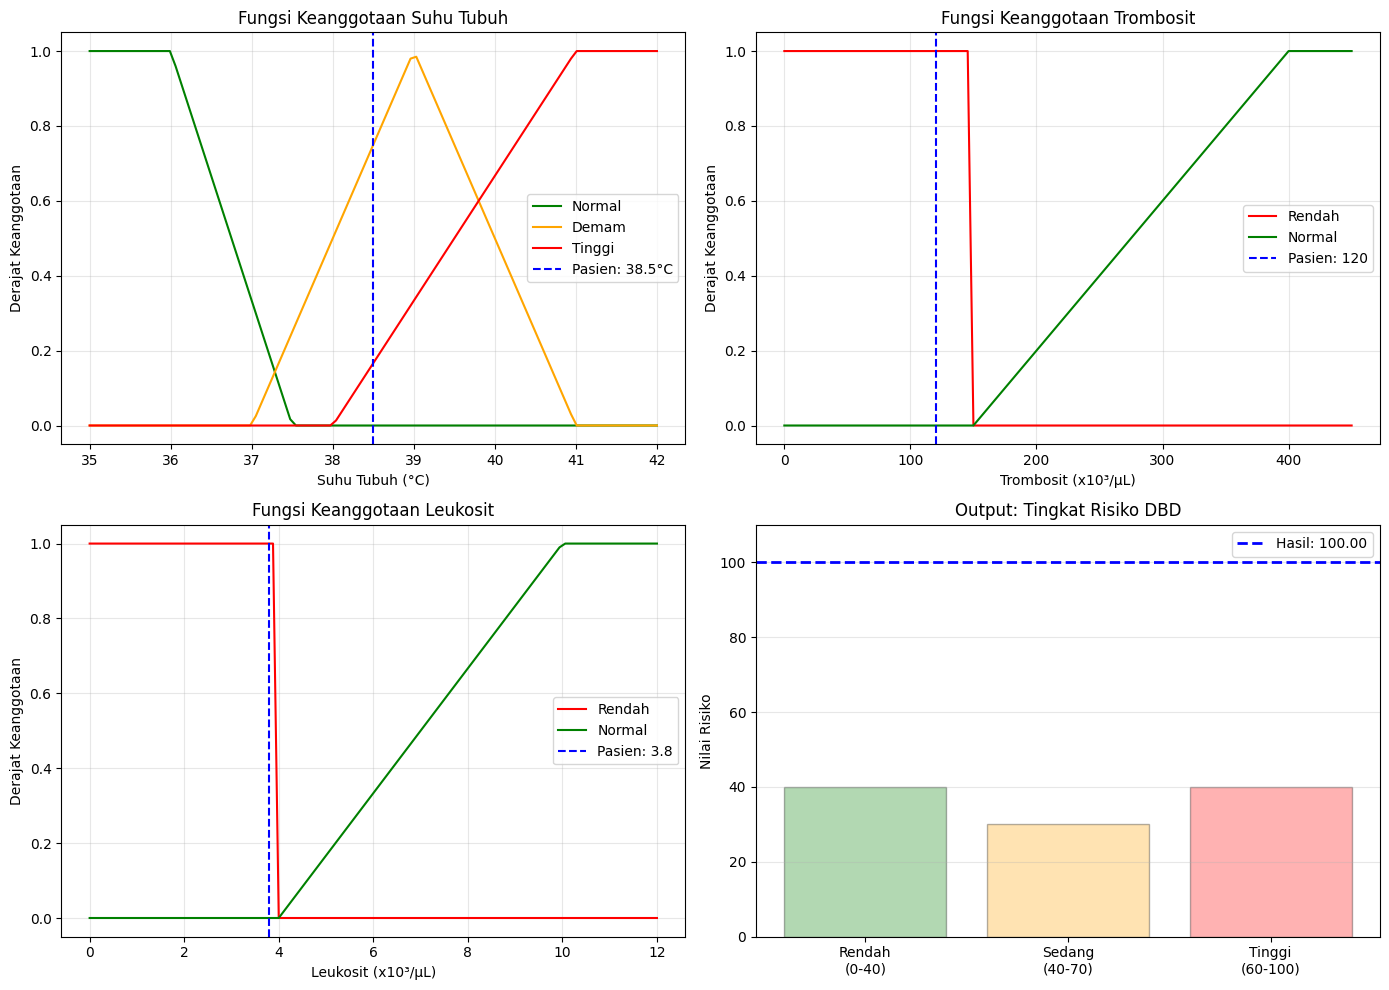


✓ Visualisasi telah disimpan sebagai 'fuzzy_sugeno_dbd.png'


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ===== FUNGSI KEANGGOTAAN UNTUK INPUT =====

# 1. Suhu Tubuh (°C)
def suhu_normal(x):
    if x <= 36:
        return 1
    elif 36 < x < 37.5:
        return (37.5 - x) / (37.5 - 36)
    else:
        return 0

def suhu_demam(x):
    if x <= 37:
        return 0
    elif 37 < x < 39:
        return (x - 37) / (39 - 37)
    elif x == 39:
        return 1
    elif 39 < x < 41:
        return (41 - x) / (41 - 39)
    else:
        return 0

def suhu_tinggi(x):
    if x <= 38:
        return 0
    elif 38 < x < 41:
        return (x - 38) / (41 - 38)
    else:
        return 1

# 2. Jumlah Trombosit (10^3/μL)
def trombosit_rendah(x):
    if x < 150:
        return 1
    else:
        return 0

def trombosit_normal(x):
    if x <= 150:
        return 0
    elif 150 < x < 400:
        return (x - 150) / (400 - 150)
    else:
        return 1

# 3. Jumlah Leukosit (10^3/μL)
def leukosit_rendah(x):
    if x < 4:
        return 1
    else:
        return 0

def leukosit_normal(x):
    if x <= 4:
        return 0
    elif 4 < x < 10:
        return (x - 4) / (10 - 4)
    else:
        return 1

# ===== ATURAN FUZZY =====
def apply_fuzzy_rules(suhu, trombosit, leukosit):
    # Hitung derajat keanggotaan untuk setiap input
    suhu_n = suhu_normal(suhu)
    suhu_d = suhu_demam(suhu)
    suhu_t = suhu_tinggi(suhu)

    tromb_r = trombosit_rendah(trombosit)
    tromb_n = trombosit_normal(trombosit)

    leuko_r = leukosit_rendah(leukosit)
    leuko_n = leukosit_normal(leukosit)

    print(f"\n=== DERAJAT KEANGGOTAAN ===")
    print(f"Suhu Normal: {suhu_n:.3f}, Demam: {suhu_d:.3f}, Tinggi: {suhu_t:.3f}")
    print(f"Trombosit Rendah: {tromb_r:.3f}, Normal: {tromb_n:.3f}")
    print(f"Leukosit Rendah: {leuko_r:.3f}, Normal: {leuko_n:.3f}")

    # Rule 1: Jika Suhu tinggi AND Trombosit rendah AND Leukosit rendah maka Risiko = Tinggi
    alpha1 = min(suhu_t, tromb_r, leuko_r)
    z1 = 100  # Output Tinggi

    # Rule 2: Jika Suhu demam AND Trombosit rendah maka Risiko = Tinggi
    alpha2 = min(suhu_d, tromb_r)
    z2 = 100  # Output Tinggi

    # Rule 3: Jika Suhu demam AND Trombosit normal maka Risiko = Sedang
    alpha3 = min(suhu_d, tromb_n)
    z3 = 50  # Output Sedang

    # Rule 4: Jika Suhu normal AND Trombosit normal AND Leukosit normal maka Risiko = Rendah
    alpha4 = min(suhu_n, tromb_n, leuko_n)
    z4 = 20  # Output Rendah

    # Rule 5: Jika Suhu tinggi AND Leukosit normal maka Risiko = Sedang
    alpha5 = min(suhu_t, leuko_n)
    z5 = 50  # Output Sedang

    print(f"\n=== DERAJAT KEANGGOTAAN RULES ===")
    print(f"Rule 1 (α1): {alpha1:.3f} → z1 = {z1}")
    print(f"Rule 2 (α2): {alpha2:.3f} → z2 = {z2}")
    print(f"Rule 3 (α3): {alpha3:.3f} → z3 = {z3}")
    print(f"Rule 4 (α4): {alpha4:.3f} → z4 = {z4}")
    print(f"Rule 5 (α5): {alpha5:.3f} → z5 = {z5}")

    # Defuzzifikasi menggunakan Weighted Average (Sugeno)
    numerator = alpha1*z1 + alpha2*z2 + alpha3*z3 + alpha4*z4 + alpha5*z5
    denominator = alpha1 + alpha2 + alpha3 + alpha4 + alpha5

    if denominator == 0:
        return 0

    result = numerator / denominator

    print(f"\n=== DEFUZZIFIKASI ===")
    print(f"Numerator: {numerator:.3f}")
    print(f"Denominator: {denominator:.3f}")
    print(f"Hasil (Weighted Average): {result:.2f}")

    return result

# ===== INTERPRETASI HASIL =====
def interpret_result(risk_value):
    if risk_value <= 40:
        return "RENDAH"
    elif 40 < risk_value <= 70:
        return "SEDANG"
    else:
        return "TINGGI"

# ===== CONTOH KASUS DARI SOAL =====
print("="*60)
print("SISTEM FUZZY SUGENO - DIAGNOSIS TINGKAT RISIKO DBD")
print("="*60)

# Data pasien dari soal
suhu_pasien = 38.5  # °C
trombosit_pasien = 120  # x10^3/μL
leukosit_pasien = 3.8  # x10^3/μL

print(f"\nData Pasien:")
print(f"- Suhu Tubuh: {suhu_pasien}°C")
print(f"- Trombosit: {trombosit_pasien} x10³/μL")
print(f"- Leukosit: {leukosit_pasien} x10³/μL")

# Proses fuzzy inference
risiko_dbd = apply_fuzzy_rules(suhu_pasien, trombosit_pasien, leukosit_pasien)

# Interpretasi hasil
kategori = interpret_result(risiko_dbd)

print(f"\n{'='*60}")
print(f"HASIL DIAGNOSIS:")
print(f"Tingkat Risiko DBD: {risiko_dbd:.2f} ({kategori})")
print(f"{'='*60}")

# ===== VISUALISASI =====
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Fungsi Keanggotaan Suhu
x_suhu = np.linspace(35, 42, 100)
y_suhu_n = [suhu_normal(x) for x in x_suhu]
y_suhu_d = [suhu_demam(x) for x in x_suhu]
y_suhu_t = [suhu_tinggi(x) for x in x_suhu]

axes[0, 0].plot(x_suhu, y_suhu_n, label='Normal', color='green')
axes[0, 0].plot(x_suhu, y_suhu_d, label='Demam', color='orange')
axes[0, 0].plot(x_suhu, y_suhu_t, label='Tinggi', color='red')
axes[0, 0].axvline(suhu_pasien, color='blue', linestyle='--', label=f'Pasien: {suhu_pasien}°C')
axes[0, 0].set_xlabel('Suhu Tubuh (°C)')
axes[0, 0].set_ylabel('Derajat Keanggotaan')
axes[0, 0].set_title('Fungsi Keanggotaan Suhu Tubuh')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Fungsi Keanggotaan Trombosit
x_tromb = np.linspace(0, 450, 100)
y_tromb_r = [trombosit_rendah(x) for x in x_tromb]
y_tromb_n = [trombosit_normal(x) for x in x_tromb]

axes[0, 1].plot(x_tromb, y_tromb_r, label='Rendah', color='red')
axes[0, 1].plot(x_tromb, y_tromb_n, label='Normal', color='green')
axes[0, 1].axvline(trombosit_pasien, color='blue', linestyle='--', label=f'Pasien: {trombosit_pasien}')
axes[0, 1].set_xlabel('Trombosit (x10³/μL)')
axes[0, 1].set_ylabel('Derajat Keanggotaan')
axes[0, 1].set_title('Fungsi Keanggotaan Trombosit')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Fungsi Keanggotaan Leukosit
x_leuko = np.linspace(0, 12, 100)
y_leuko_r = [leukosit_rendah(x) for x in x_leuko]
y_leuko_n = [leukosit_normal(x) for x in x_leuko]

axes[1, 0].plot(x_leuko, y_leuko_r, label='Rendah', color='red')
axes[1, 0].plot(x_leuko, y_leuko_n, label='Normal', color='green')
axes[1, 0].axvline(leukosit_pasien, color='blue', linestyle='--', label=f'Pasien: {leukosit_pasien}')
axes[1, 0].set_xlabel('Leukosit (x10³/μL)')
axes[1, 0].set_ylabel('Derajat Keanggotaan')
axes[1, 0].set_title('Fungsi Keanggotaan Leukosit')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Output Risiko DBD
x_risk = [20, 50, 100]
y_risk = [0, 0, 0]
labels_risk = ['Rendah\n(0-40)', 'Sedang\n(40-70)', 'Tinggi\n(60-100)']
colors_risk = ['green', 'orange', 'red']

bars = axes[1, 1].bar(labels_risk, [40, 30, 40], color=colors_risk, alpha=0.3, edgecolor='black')
axes[1, 1].axhline(risiko_dbd, color='blue', linestyle='--', linewidth=2, label=f'Hasil: {risiko_dbd:.2f}')
axes[1, 1].set_ylabel('Nilai Risiko')
axes[1, 1].set_title('Output: Tingkat Risiko DBD')
axes[1, 1].set_ylim([0, 110])
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('fuzzy_sugeno_dbd.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualisasi telah disimpan sebagai 'fuzzy_sugeno_dbd.png'")